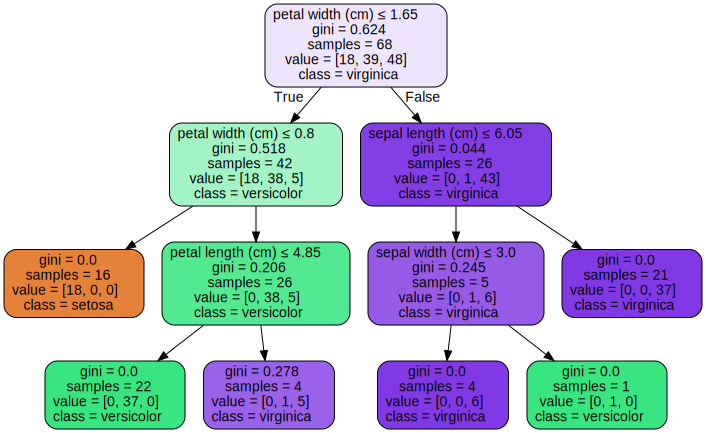

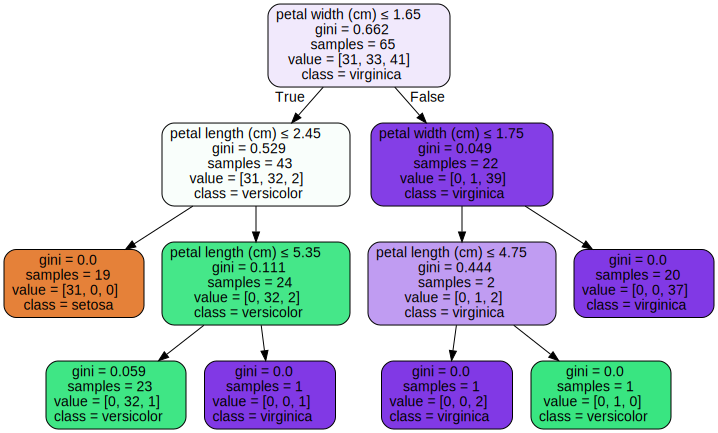

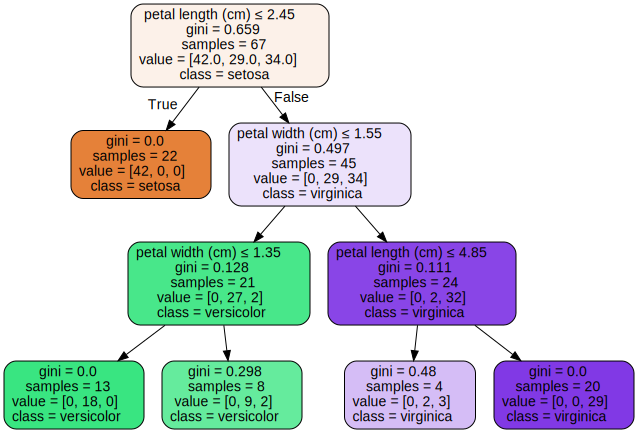

Accuracy: 1.0


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
import graphviz
from IPython.display import display

# Irisデータセットを読み込む
iris = load_iris()
X = iris.data  # type: ignore
y = iris.target  # type: ignore

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# ランダムフォレストモデルを学習
model = RandomForestClassifier(n_estimators=3, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# 最初の決定木を可視化
for estimator in model.estimators_:
    dot_data = export_graphviz(
        estimator,
        out_file=None,
        feature_names=iris.feature_names,  # type: ignore
        class_names=iris.target_names,  # type: ignore
        filled=True,
        rounded=True,
        special_characters=True
    )

    graph = graphviz.Source(dot_data)
    display(graph)

y_pred = model.predict(X_test)

# 5. 評価
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')